In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Store filepath in a variable
file_path_test = Path("Resources/cleaned_testing_data.csv")
file_path_train = Path("Resources/cleaned_training_data.csv")

In [3]:
# Read CSV files
data_test = pd.read_csv(file_path_test)
data_train = pd.read_csv(file_path_train)

In [4]:
# Display the first few rows of each dataset
print("Initial Test Data Overview:")
display(data_test.head())

Initial Test Data Overview:


accountage  monthlycharges  totalcharges subscriptiontype  \
0          38       17.869374    679.036195          Premium   
1          77        9.912854    763.289768            Basic   
2           5       15.019011     75.095057         Standard   
3          88       15.357406   1351.451692         Standard   
4          91       12.406033   1128.949004         Standard   

      paymentmethod paperlessbilling contenttype multideviceaccess  \
0      Mailed check               No    TV Shows                No   
1  Electronic check              Yes    TV Shows                No   
2     Bank transfer               No    TV Shows               Yes   
3  Electronic check               No        Both               Yes   
4       Credit card              Yes    TV Shows               Yes   

  deviceregistered  viewinghoursperweek  averageviewingduration  \
0               TV            29.126308              122.274031   
1               TV            36.873729               57.093319   
2         Computer             7.601729              140.414001   
3           Tablet            35.586430              177.002419   
4           Tablet            23.503651               70.308376   

   contentdownloadspermonth genrepreference  userrating  \
0                        42          Comedy    3.522724   
1                        43          Action    2.021545   
2                        14          Sci-Fi    4.806126   
3                        14          Comedy    4.943900   
4                         6           Drama    2.846880   

   supportticketspermonth  gender  watchlistsize parentalcontrol  \
0                       2    Male             23              No   
1                       2  Female             22             Yes   
2                       2  Female             22              No   
3                       0  Female             23             Yes   
4                       6  Female              0              No   

  subtitlesenabled  customerid  
0               No  O1W6BHP6RM  
1               No  LFR4X92X8H  
2              Yes  QM5GBIYODA  
3              Yes  D9RXTK2K9F  
4               No  ENTCCHR1LR

In [5]:
print("\nInitial Train Data Overview:")
display(data_train.head())


Initial Train Data Overview:


accountage  monthlycharges  totalcharges subscriptiontype  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      paymentmethod paperlessbilling contenttype multideviceaccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  deviceregistered  viewinghoursperweek  ...  contentdownloadspermonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...                        18   
2         Computer             7.395160  ...                        23   
3           Tablet            27.960389  ...                        30   
4               TV            20.083397  ...                        20   

   genrepreference userrating  supportticketspermonth  gender watchlistsize  \
0           Sci-Fi   2.176498                       4    Male             3   
1           Action   3.478632                       8    Male            23   
2          Fantasy   4.238824                       6    Male             1   
3            Drama   4.276013                       2    Male            24   
4           Comedy   3.616170                       4  Female             0   

   parentalcontrol subtitlesenabled  customerid churn  
0               No               No  CB6SXPNVZA     0  
1               No              Yes  S7R2G87O09     0  
2              Yes              Yes  EASDC20BDT     0  
3              Yes              Yes  NPF69NT69N     0  
4               No               No  4LGYPK7VOL     0  

[5 rows x 21 columns]

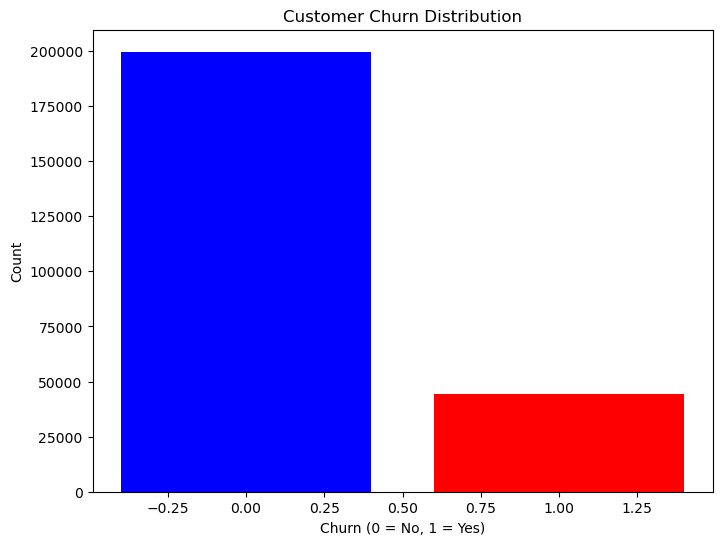

In [6]:
#to visualize the distribution of churned vs. non-churned customers.
# Count the values in the 'Churn' column
churn_counts = data_train['churn'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['blue', 'red'])  

plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Show plot
plt.show()


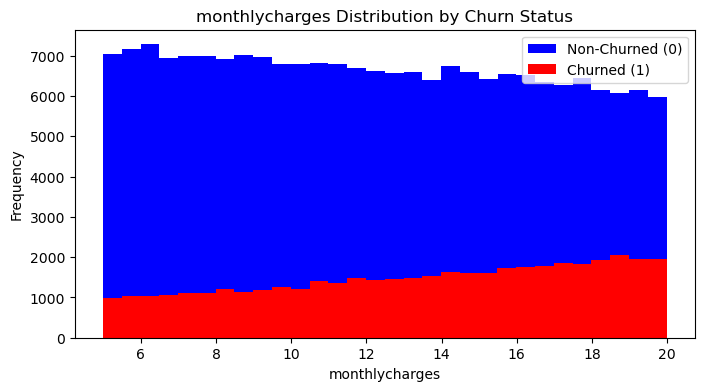

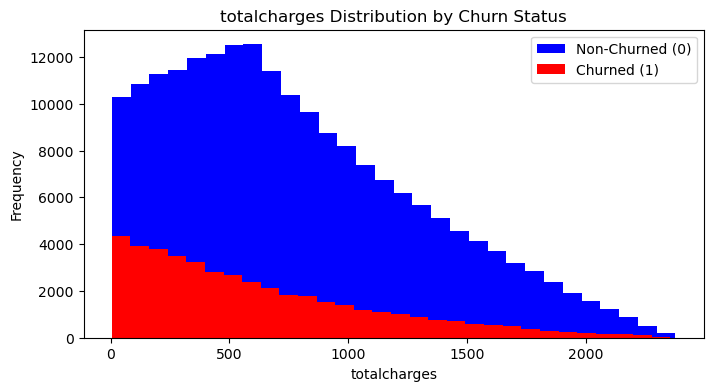

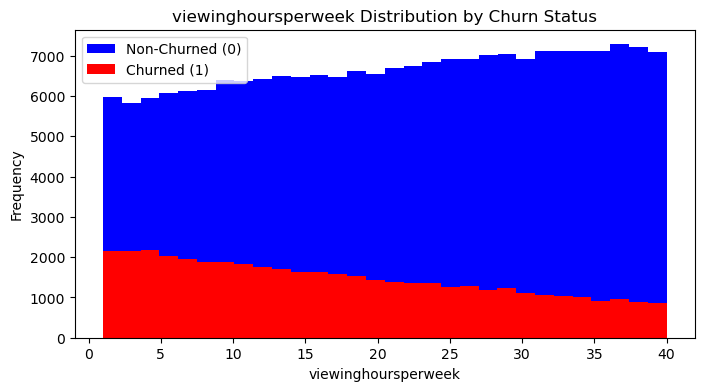

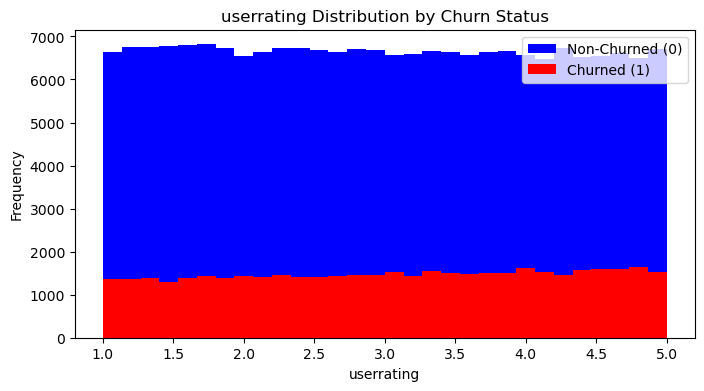

In [7]:
#to examine how features like MonthlyCharges/ TotalCharges...differ between churned and non-churned customers.
# List of numeric features to analyze
numeric_features = ["monthlycharges", "totalcharges", "viewinghoursperweek", "userrating"]

# Loop through each feature to plot its distribution by churn status
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    
    # Separate the data for churned and non-churned customers
    churned = data_train[data_train['churn'] == 1][feature]
    non_churned = data_train[data_train['churn'] == 0][feature]
    
    # Plot histograms for each group
    plt.hist(non_churned, bins=30, alpha=1, color='blue', label="Non-Churned (0)")
    plt.hist(churned, bins=30, alpha=1, color='red', label="Churned (1)")
    
    # Add title and labels
    plt.title(f"{feature} Distribution by Churn Status")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    
    # Show the plot
    plt.show()


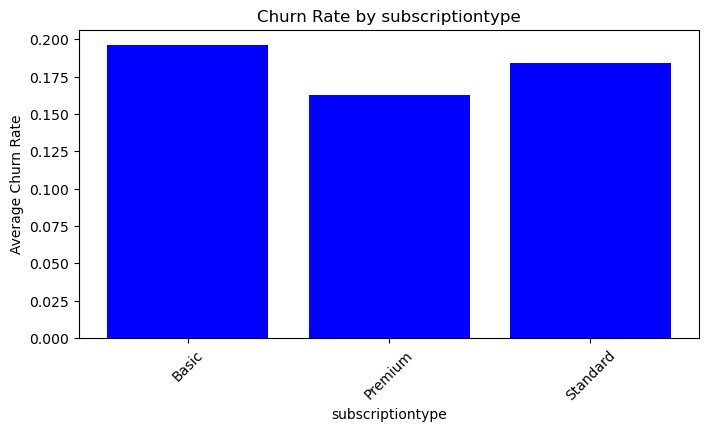

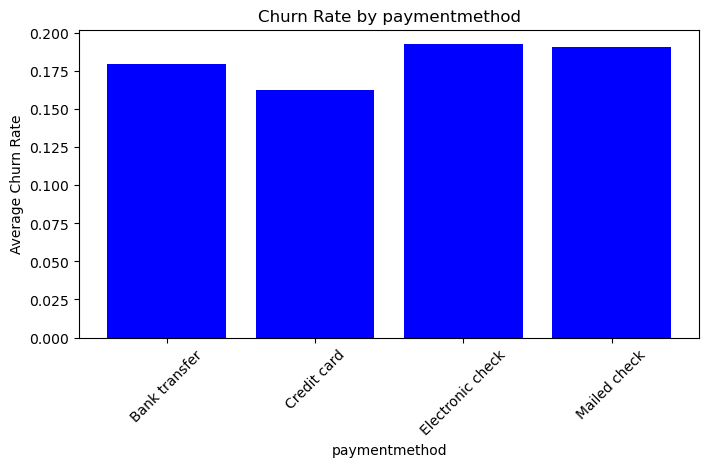

In [8]:
#to find the churn rate for category in features like SubscriptionType and PaymentMethod.
# Categorical features to analyze
categorical_features = ["subscriptiontype", "paymentmethod"]

# Loop through each categorical feature
for feature in categorical_features:
    # Calculate the average churn rate for each category
    churn_percentage = data_train.groupby(feature)["churn"].mean()
    
    # Create a bar plot
    plt.figure(figsize=(8, 4))
    plt.bar(churn_percentage.index, churn_percentage.values, color='blue')  # Using a color similar to 'viridis'

    # Set plot title and labels
    plt.title(f"Churn Rate by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Churn Rate")
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()


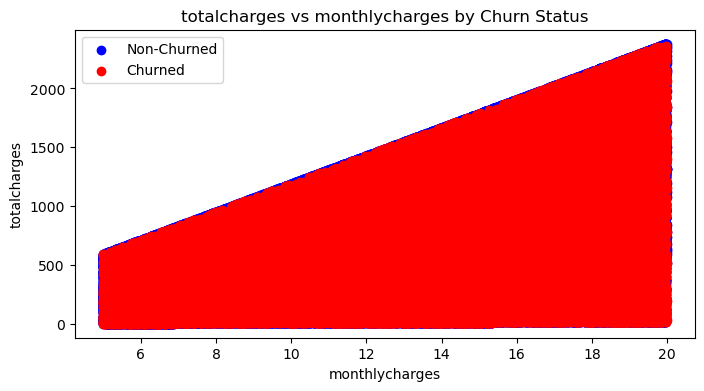

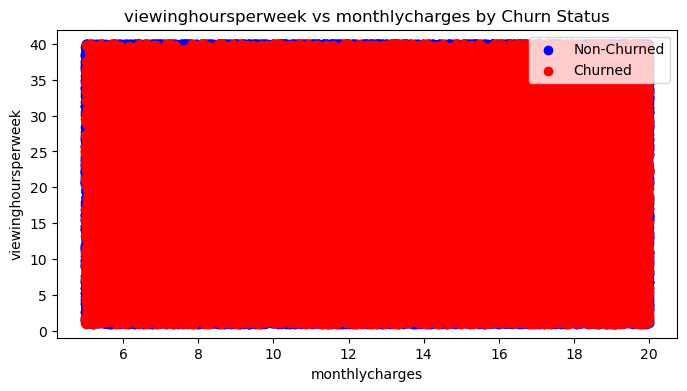

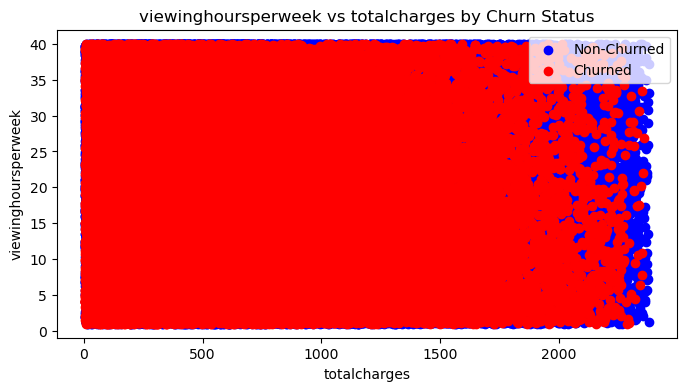

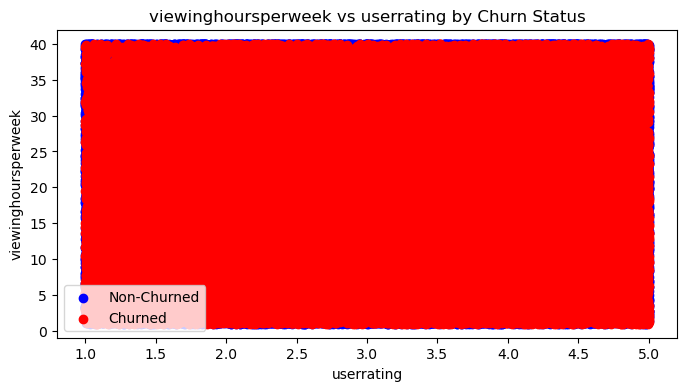

In [9]:
#pairs of features to analyze
pairs_to_plot = [
    ("monthlycharges", "totalcharges"),
    ("monthlycharges", "viewinghoursperweek"),
    ("totalcharges", "viewinghoursperweek"),
    ("userrating", "viewinghoursperweek")
]

# Plot scatter plots for each pair
for x_feature, y_feature in pairs_to_plot:
    plt.figure(figsize=(8, 4))
    plt.scatter(
        data_train[x_feature][data_train["churn"] == 0], 
        data_train[y_feature][data_train["churn"] == 0], 
        color='blue', alpha=1, label='Non-Churned'
    )
    plt.scatter(
        data_train[x_feature][data_train["churn"] == 1], 
        data_train[y_feature][data_train["churn"] == 1], 
        color='red', alpha=1, label='Churned'
    )
    
    # Set labels and title
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"{y_feature} vs {x_feature} by Churn Status")
    plt.legend()
    plt.show()


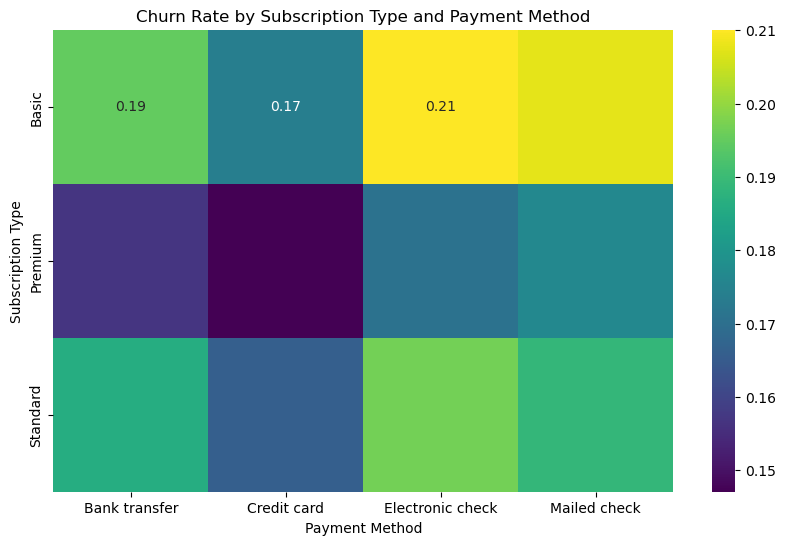

In [10]:
#Heatmap of Customer Churn by Subscription Type and Payment Method 
#Pivot the data to get churn rate by SubscriptionType and PaymentMethod
churn_pivot = data_train.pivot_table(index="subscriptiontype", columns="paymentmethod", values="churn", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(churn_pivot, annot=True, cmap="viridis", fmt=".2f")
plt.title("Churn Rate by Subscription Type and Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Subscription Type")
plt.show()


/Users/dhwani/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhwani/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dhwani/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/dhwani/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:

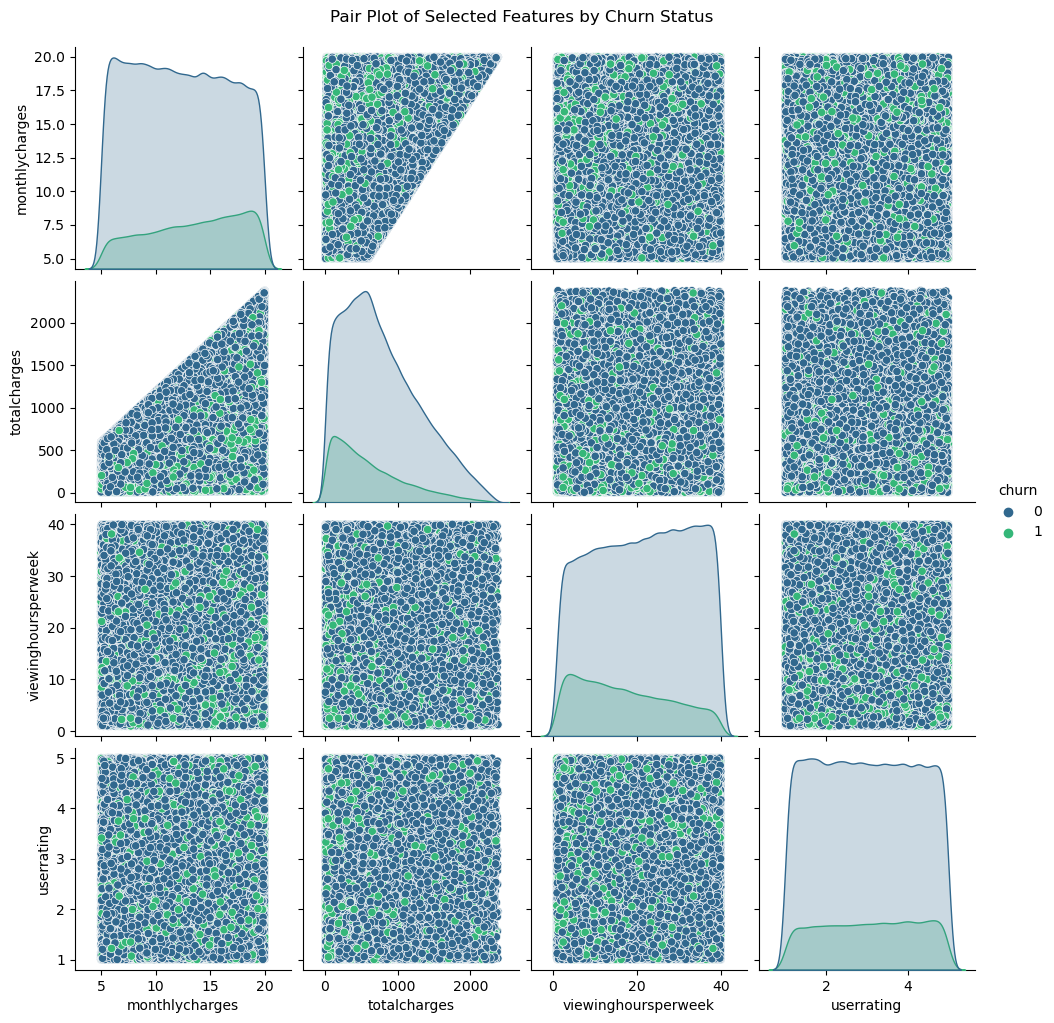

In [11]:
# Select a subset of numeric features for pair plotting
selected_features = ["monthlycharges", "totalcharges", "viewinghoursperweek", "userrating", "churn"]

#pair plot with hue based on churn status
sns.pairplot(data=data_train[selected_features], hue="churn", palette="viridis")
plt.suptitle("Pair Plot of Selected Features by Churn Status", y=1.02)
plt.show()


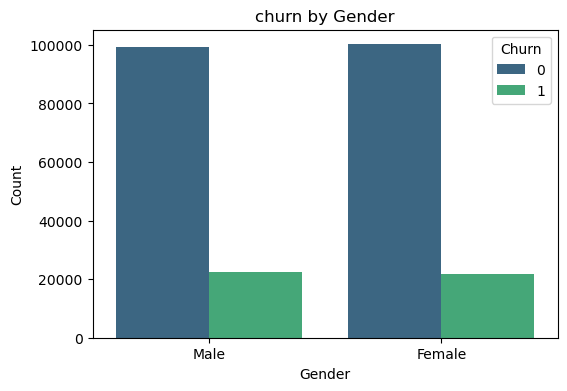

In [12]:
# Plot churn by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=data_train, palette='viridis')
plt.title("churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()


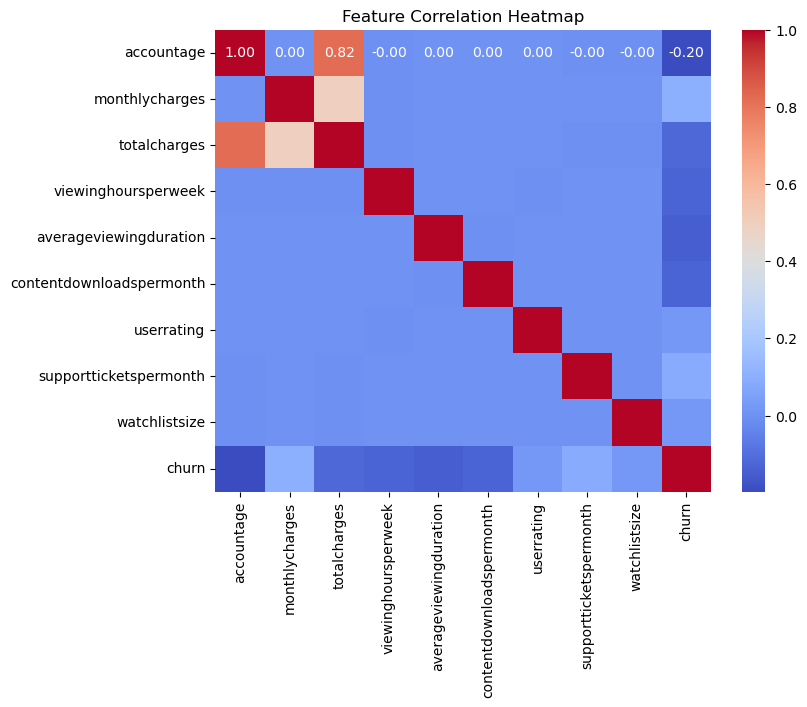

In [14]:
#non-numeric columns 
numeric_data = data_train.select_dtypes(include=['float64', 'int64'])

#correlation heatmap
plt.figure(figsize=(8, 6))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


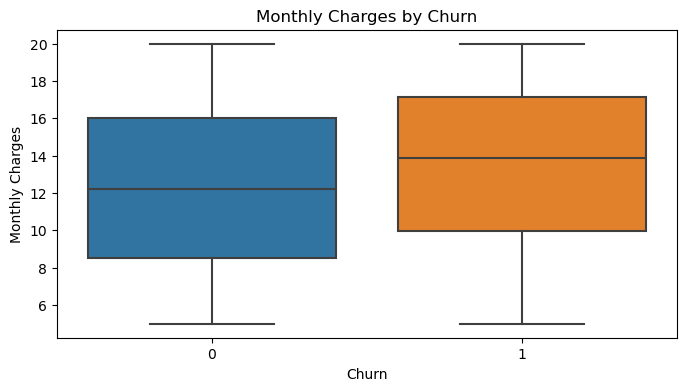

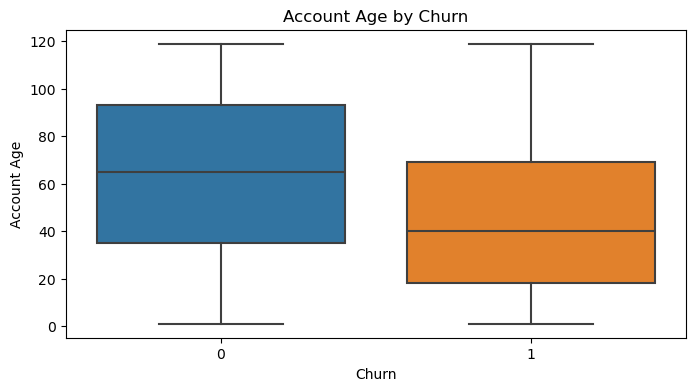

In [20]:
# Boxplot for Monthly Charges by Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='churn', y='monthlycharges', data=data_train)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# Box plot for Account Age by Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='churn', y='accountage', data=data_train)
plt.title("Account Age by Churn")
plt.xlabel("Churn")
plt.ylabel("Account Age")
plt.show()


In [25]:
# Separate features and target variable
X = data_train.drop('churn', axis=1)
y = data_train['churn']

# Convert categorical columns to numeric
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=4)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=4)

In [27]:
#predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.820788383444768

Confusion Matrix:
 [[39272   599]
 [ 8139   748]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90     39871
           1       0.56      0.08      0.15      8887

    accuracy                           0.82     48758
   macro avg       0.69      0.53      0.52     48758
weighted avg       0.78      0.82      0.76     48758



In [28]:
# Get feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


                          Importance
averageviewingduration      0.105290
viewinghoursperweek         0.100655
monthlycharges              0.092953
totalcharges                0.089974
accountage                  0.088917
customerid                  0.081364
userrating                  0.081144
contentdownloadspermonth    0.076926
watchlistsize               0.058364
supportticketspermonth      0.043073
genrepreference             0.030019
deviceregistered            0.026278
paymentmethod               0.024467
contenttype                 0.020329
subscriptiontype            0.019411
multideviceaccess           0.012368
gender                      0.012127
parentalcontrol             0.012127
subtitlesenabled            0.012119
paperlessbilling            0.012096
